In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

Data Prep

In [76]:
df2 = pd.read_csv('../../csv/Combined_Data_Frame.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# df2 = pd.read_csv('../../csv/demand_2.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df2 = df2.sort_values('Record Date')
df2 = df2.interpolate() 
df2 = df2[1:]
# df2

Data Split

In [77]:
# Setting the prediction period
period = 29

In [78]:
X = df2['Total Demand'].values 
train, test = X[1:len(X)-period], X[len(X)-period:]

w = df2['Wind Speed'].values
w_train, w_test = w[1:len(w)-period], w[len(w)-period:]

a = df2['Air Temperature'].values
a_train, a_test = a[1:len(a)-period], a[len(a)-period:] 

# ap = df2['Air Temperature(Apparent)'].values
# ap_train, ap_test = ap[1:len(ap)-period], ap[len(ap)-period:] 

c = df2['Cloud Coverage'].values
c_train, c_test = c[1:len(c)-period], c[len(c)-period:] 

array_train = np.array([c_train, w_train, a_train])
array_test = np.array([c_test, w_test, a_test])

array_train = array_train.reshape((1429,  3)) 
array_test = array_test.reshape((period, 3))

Model

/Users/daniilsaleksasins/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


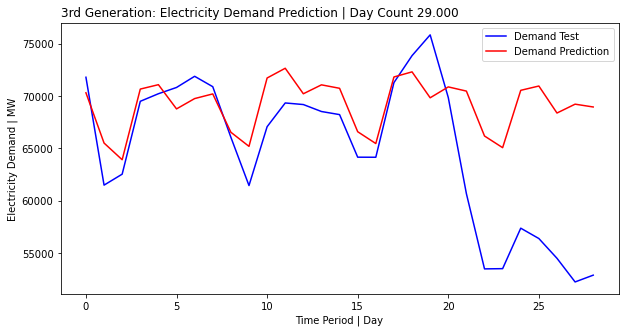

MAE of the model is: 5290.674


In [79]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ar_select_order

lags = ar_select_order(train, maxlag=30, seasonal=True, period=12)

auto = AutoReg(train, lags=lags.ar_lags, trend="t", seasonal=True, exog=array_train, period=12).fit()
predictions = auto.predict(start=len(train), end=len(train)+len(test)-1, exog_oos=array_test)

plt.figure(figsize=(10, 5))
plt.title("3rd Generation: Electricity Demand Prediction | Day Count %.3f" % period, loc = 'left')

plt.plot(test, color='blue', label='Demand Test')
plt.plot(predictions, color='red', label = 'Demand Prediction')


plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show()

mae = mean_absolute_error(test, predictions)
print('MAE of the model is: %.3f' % mae)